In [1]:
import re
import numpy as np
from scipy.spatial import distance
import scipy as sc
from scipy import linalg
from matplotlib import pylab as plt

In [2]:
with open("sentences.txt", "r") as file:
    lines_list = file.readlines()
    file.close()
sentence_list = []

for line in lines_list:
    sentence = re.split('[^a-z]+', line
                        .strip()
                        .lower()
                        )
    sentence_list.append(sentence[:-1])
words_dict = dict()
word_index = 0

In [3]:
for sentence in sentence_list:
    for word in sentence:
        if words_dict.get(word) is None:
            words_dict[word] = word_index
            word_index += 1

sentence_list_length = len(sentence_list)
words_dict_length = len(words_dict)
matrix = np.zeros((
    sentence_list_length,
    words_dict_length
))
for i in range(sentence_list_length):
    for word_in_dict, j in zip(words_dict, range(words_dict_length)):
        for word_in_sentence in sentence_list[i]:
            if word_in_sentence == word_in_dict:
                matrix[i, j] += 1

In [4]:
value_list = [2, 2]
answer_list = [0, 0]
first_row = matrix[0, :]
for i in range(1, len(matrix)):
    current_distance_value = distance.cosine(first_row, matrix[i, :])
    if current_distance_value < value_list[1]:
        if current_distance_value < value_list[0]:
            value_list[1] = value_list[0]
            value_list[0] = current_distance_value
            answer_list[1] = answer_list[0]
            answer_list[0] = i
        else:
            value_list[1] = current_distance_value
            answer_list[1] = i

In [5]:
def f(x):
    return sc.sin(x / 5.0) * sc.exp(x / 10.) + 5 * sc.exp((-x) / 2.)

In [6]:
points_list = [1, 4, 10, 15]
free_variables_list = list(map(f, points_list))

xa = np.array([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]])
ba = np.array(free_variables_list)
w = linalg.solve(xa, ba)

/home/neighbourhood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  
/home/neighbourhood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  


In [7]:
def new_f(x):
    return w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3

/home/neighbourhood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  
/home/neighbourhood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  


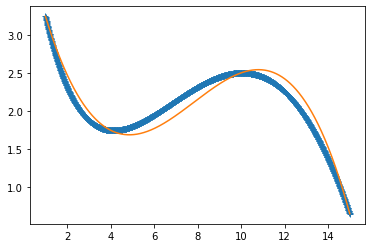

In [8]:
x = np.arange(1, 15, 0.01)
plt.plot(x, f(x), '+', x, new_f(x), '-')
plt.show()

In [9]:
with open("submission-1.txt", "w") as file:
    file.write('{0[0]} {0[1]}'.format(answer_list))
    file.close()
    
with open("submission-2.txt", "w") as file:
    file.write('{0[0]} {0[1]} {0[2]} {0[3]}'.format([round(item, 2) for item in w]))
    file.close()